In [2]:
import numpy as np
import pylab as plt
import networkx as nx

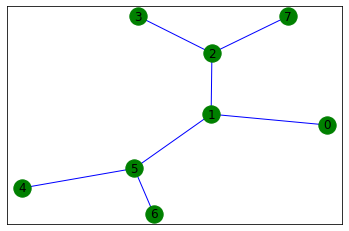

In [3]:
points_list = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]

goal = 7
mapping = {0: 'Start', 1: '1', 2: '2', 3: '3',
           4: '4', 5: '5', 6: '6', 7: '7-Destination'}
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k=.5, center=points_list[2])
nx.draw_networkx_nodes(G, pos, node_color='g')
nx.draw_networkx_edges(G, pos, edge_color='b')
nx.draw_networkx_labels(G, pos)
plt.show()


In [4]:
NO_OF_POINTS = 8

In [5]:
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        
        R[point[::-1]] = 0


R[goal, goal] = 150
R


Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))


(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [6]:
gamma = 0.8

initial_state = 1


def available_actions(state):
    current_state_row = R[state, ]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [7]:
available_act = available_actions(initial_state)

In [8]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

In [9]:
action = sample_next_action(available_act)

In [14]:
def update(current_state, action, gamma):
    max_index = (np.where(Q[action, ] == np.max(Q[action, ]))[1])
    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

In [15]:
update(initial_state, action, gamma)

max_value 0.0


0

In [16]:
scores = []

for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score:', str(score))

    print("Trained Q matrix:")
    print(Q/np.max(Q)*100)

         0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19889401   0.           0.        ]
 [  0.          63.99861751   0.           0.          40.95911521
    0.          40.95911521   0.        ]
 [  0.           0.           0.           0.           0.
   51.19889401   0.           0.        ]
 [  0.           0.          79.99970027   0.           0.
    0.           0.         100.        ]]
max_value 479.9910083395361
Score: 982.7104307816679
Trained Q matrix:
[[  0.          63.99976022   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19889401   0.          79.99970027   0.           0.
   51.19889401   0.           0.        ]
 [  0.          63.99976022   0.          63.99976022   0.
    0.           0.          99.99962534]
 [  0.           0.          79.99970027   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.

Most efficient path:
[0, 1, 2, 7]


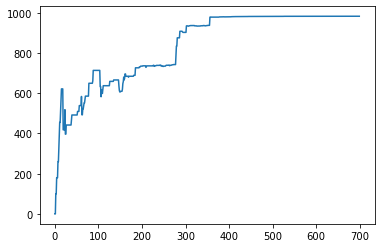

In [17]:
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(
        Q[current_state, ] == np.max(Q[current_state, ]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index


print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()